# Hybrid Mutual Fund Analysis:


### Aim:
   To Analyse various parameters related to the Hybrid Mutual fund dataset and find distinction between good and bad schemes

#### Description:
A hybrid fund is an investment fund that is characterized by diversification among two or more asset classes. These funds typically invest in a mix of stocks and bonds. The term hybrid indicates that the fund strategy includes investment in multiple asset classes. These funds offer investors an option for investing in multiple asset classes through a single fund. These funds can offer varying levels of risk tolerance ranging from conservative to moderate and aggressive.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('HMF.xlsx')

In [3]:
data.head()

,Unnamed: 0,Sl_No.,Fund_Scheme_Name,Category,Launch_Date,Crisil_Rating,Net_Assets_(Cr),1_Yr_Return,3_Yr_Return,5_Yr_Return,...,Expense_Ratio,Sharpe_Ratio,Sortino_Ratio,Alpha,Beta,Std_Dev,R_Squared,Year_Trailing,Net_Return,Good
0,0,1,UTI Arbitrage Fund #,Arbitrage,2006-06-29,Rank 1,1397.70,6.52,6.24,6.60,...,0.83,-0.03,-0.04,0.60,0.33,0.45,0.00,13,7.40,0
1,1,2,LIC MF Debt Hybrid Fund #,Conservative,2003-06-02,Rank 1,84.93,7.68,5.92,6.55,...,2.30,-0.08,-0.12,-1.91,0.58,3.07,62.19,16,7.73,0
2,2,3,ICICI Prudential Regular Savings Fund #,Conservative,2004-03-30,Rank 1,1589.42,8.40,9.33,9.92,...,2.24,0.84,1.36,1.91,1.58,3.57,88.45,15,10.06,1
3,3,4,Reliance Arbitrage Fund #,Arbitrage,2010-10-14,Rank 2,8535.00,6.64,6.41,6.86,...,1.04,0.26,0.45,0.70,1.30,0.54,85.00,8,17.83,1
4,4,5,Kotak Equity Arbitrage Fund #,Arbitrage,2005-09-29,Rank 2,13360.00,6.56,6.32,6.75,...,0.97,0.14,0.23,0.56,1.26,0.45,87.45,13,18.45,1


In [4]:
data.describe()

,Unnamed: 0,Sl_No.,Net_Assets_(Cr),1_Yr_Return,3_Yr_Return,5_Yr_Return,Expense_Ratio,Sharpe_Ratio,Sortino_Ratio,Alpha,Beta,Std_Dev,R_Squared,Year_Trailing,Net_Return,Good
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.500000,15.500000,4523.254637,7.257000,7.685000,8.346333,1.718333,0.165000,0.263000,0.331333,1.437667,4.792667,61.608333,15.266667,11.528333,0.466667
std,8.803408,8.803408,7952.466690,1.567997,1.924327,1.832329,0.575243,0.362717,0.612063,1.568361,1.217682,3.690865,38.442155,4.961461,4.102575,0.507416
min,0.000000,1.000000,12.230700,4.830000,5.740000,6.250000,0.750000,-0.670000,-1.180000,-2.450000,-0.690000,0.440000,0.000000,5.000000,6.650000,0.000000
25%,7.250000,8.250000,113.197500,6.127500,6.217500,6.667500,1.017500,-0.007500,-0.010000,-1.082500,0.587500,0.587500,32.210000,12.250000,7.512500,0.000000
50%,14.500000,15.500000,1488.350000,6.965000,6.860000,7.935000,1.855000,0.240000,0.380000,0.580000,0.995000,4.050000,85.050000,15.000000,10.225000,0.000000
75%,21.750000,22.750000,4350.500000,8.385000,8.720000,9.470000,2.197500,0.327500,0.550000,1.360000,2.310000,8.495000,89.907500,18.750000,14.357500,1.000000
max,29.000000,30.000000,30028.000000,10.610000,11.460000,12.000000,2.400000,0.840000,1.360000,3.980000,3.920000,11.740000,96.810000,26.000000,19.860000,1.000000


In [5]:
#Skewness is the measure of the assymetry of data about its mean. Used to check if the mass of data is positive/negative 
#that is right skewed or left skewed
data.skew()

Unnamed: 0         0.000000
Sl_No.             0.000000
Net_Assets_(Cr)    2.320185
1_Yr_Return        0.596719
3_Yr_Return        0.983600
5_Yr_Return        0.756581
Expense_Ratio     -0.579551
Sharpe_Ratio      -0.574800
Sortino_Ratio     -0.583262
Alpha             -0.014383
Beta               0.657854
Std_Dev            0.285394
R_Squared         -0.832263
Year_Trailing     -0.137841
Net_Return         0.463050
Good               0.140769
dtype: float64

## EDA

Text(8.0, 0.21, 'Positively Skewed')

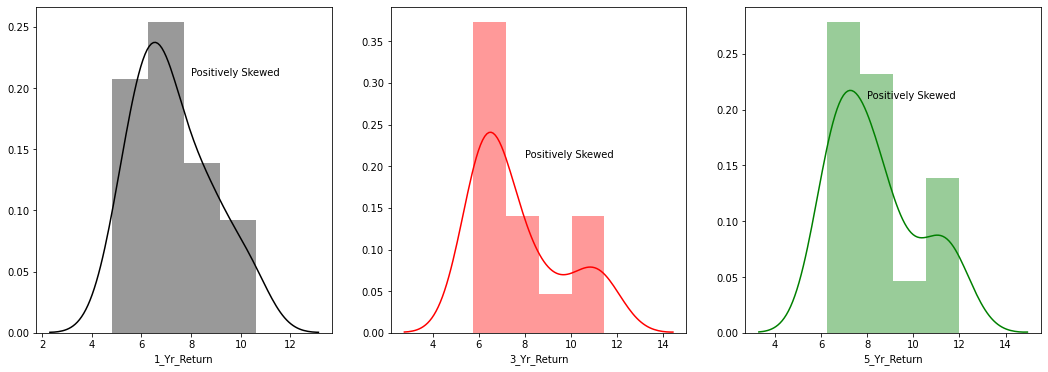

In [6]:
# Plotting graphs for 1 year return,3 year return and 5 year return
fig, ax = plt.subplots(1,3, figsize=(18,6))
sns.distplot(data['1_Yr_Return'], ax=ax[0], color='black')
ax[0].text(8.0,0.21,"Positively Skewed")
sns.distplot(data['3_Yr_Return'], ax=ax[1], color='red')
ax[1].text(8.0,0.21,"Positively Skewed")
sns.distplot(data['5_Yr_Return'], ax=ax[2], color='green')
ax[2].text(8.0,0.21,"Positively Skewed")

Text(0.5, 0.75, 'Negatively skewed')

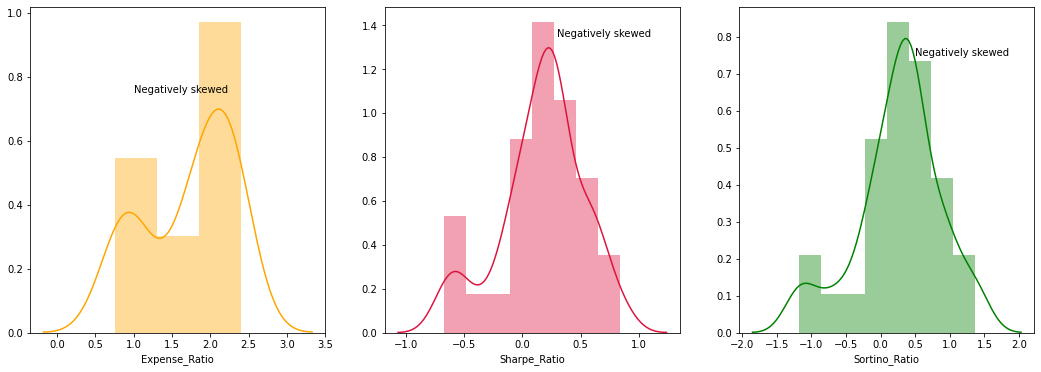

In [7]:
# Plotting graphs for Expense ratio,sharp_ratio and sortino ratio
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.distplot(data['Expense_Ratio'], ax=ax[0], color='orange')
ax[0].text(1.0,0.75,"Negatively skewed")

sns.distplot(data['Sharpe_Ratio'], ax=ax[1], color='crimson')
ax[1].text(0.3,1.35,"Negatively skewed")

sns.distplot(data['Sortino_Ratio'], ax=ax[2], color='green')
ax[2].text(0.5,0.75,"Negatively skewed")

In [8]:
data['Category'].value_counts()

Conservative     11
Aggressive       10
Arbitrage         9
Name: Category, dtype: int64

In [9]:
data['Crisil_Rating'].value_counts()

Rank 3    12
Rank 2    10
Rank 1     3
Rank 5     3
Rank 4     2
Name: Crisil_Rating, dtype: int64

#### 1 yr Return

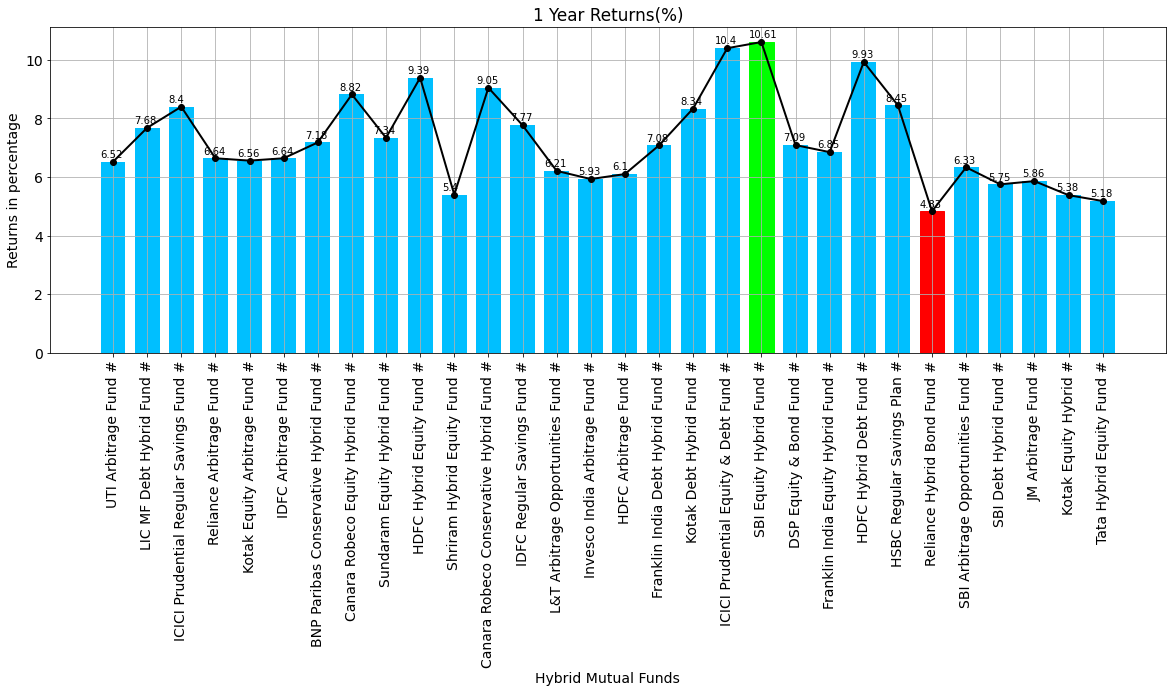

In [11]:
x = data['Fund_Scheme_Name']
y = data['1_Yr_Return']

#Bar Plot
bars = plt.bar(x, y, color='deepskyblue', width=0.73)
bars[data['1_Yr_Return'].idxmin()].set_color('red')
bars[data['1_Yr_Return'].idxmax()].set_color('lime')
plt.title('1 Year Returns(%)')
plt.xlabel('Hybrid Mutual Funds')
plt.ylabel('Returns in percentage')
plt.grid()
plt.xticks(x, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
#Line Plot
plt.plot(x, y, linewidth='2.0', color='black', marker='o', markersize='6')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)

#### 3 yr Return

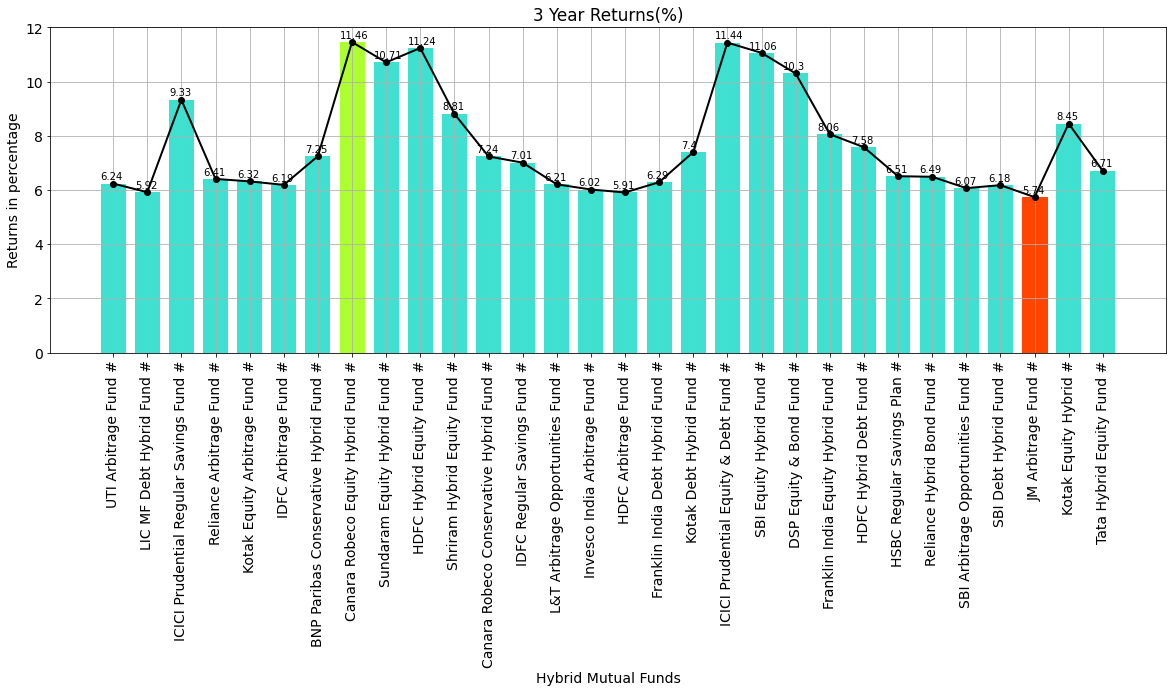

In [12]:
x = data['Fund_Scheme_Name']
y = data['3_Yr_Return']

#Bar Plot
bars = plt.bar(x, y, color='turquoise', width=0.73)
bars[data['3_Yr_Return'].idxmin()].set_color('orangered')
bars[data['3_Yr_Return'].idxmax()].set_color('greenyellow')
plt.title('3 Year Returns(%)')
plt.xlabel('Hybrid Mutual Funds')
plt.ylabel('Returns in percentage')
plt.grid()
plt.xticks(x, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
#Line Plot
plt.plot(x, y, linewidth='2.0', color='black', marker='o', markersize='6')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)

#### 5 yr Return

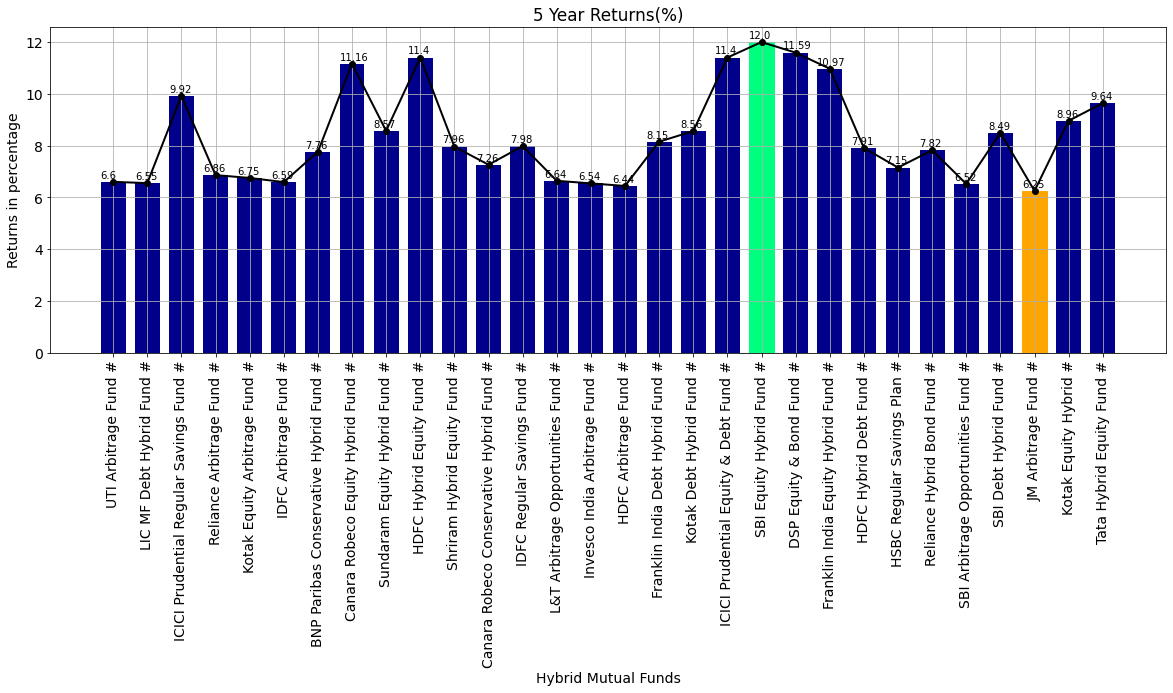

In [13]:
x = data['Fund_Scheme_Name']
y = data['5_Yr_Return']

#Bar Plot
bars = plt.bar(x, y, color='darkblue', width=0.73)
bars[data['5_Yr_Return'].idxmin()].set_color('orange')
bars[data['5_Yr_Return'].idxmax()].set_color('springgreen')
plt.title('5 Year Returns(%)')
plt.xlabel('Hybrid Mutual Funds')
plt.ylabel('Returns in percentage')
plt.grid()
plt.xticks(x, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
#Line Plot
plt.plot(x, y, linewidth='2.0', color='black', marker='o', markersize='6')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)

#### Comparing 1yr,3yr and 5 yr returns

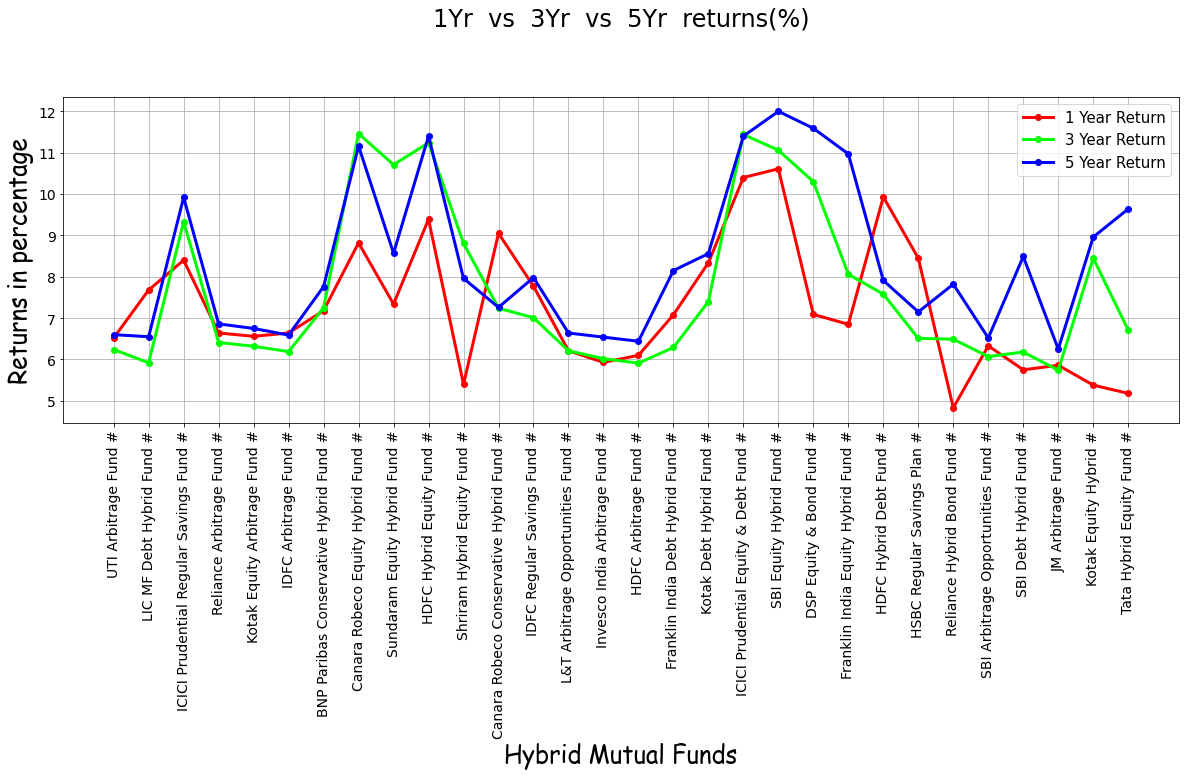

In [14]:
X=data['Fund_Scheme_Name']
Y1=data['1_Yr_Return']
Y2=data['3_Yr_Return']
Y3=data['5_Yr_Return']
labels=['1 Year Return', '3 Year Return', '5 Year Return']
lines=plt.plot(X, Y1, linewidth='3.0', color='red', marker='o', markersize='6')
lines=plt.plot(X, Y2, linewidth='3.0', color='lime', marker='o', markersize='6')
lines=plt.plot(X, Y3, linewidth='3.0', color='blue', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('1Yr  vs  3Yr  vs  5Yr  returns(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

#### This graph illustrates multiple lines representing 1 year, 3 year and 5 year returns and their growth or decline with respect to Hybrid mutual funds

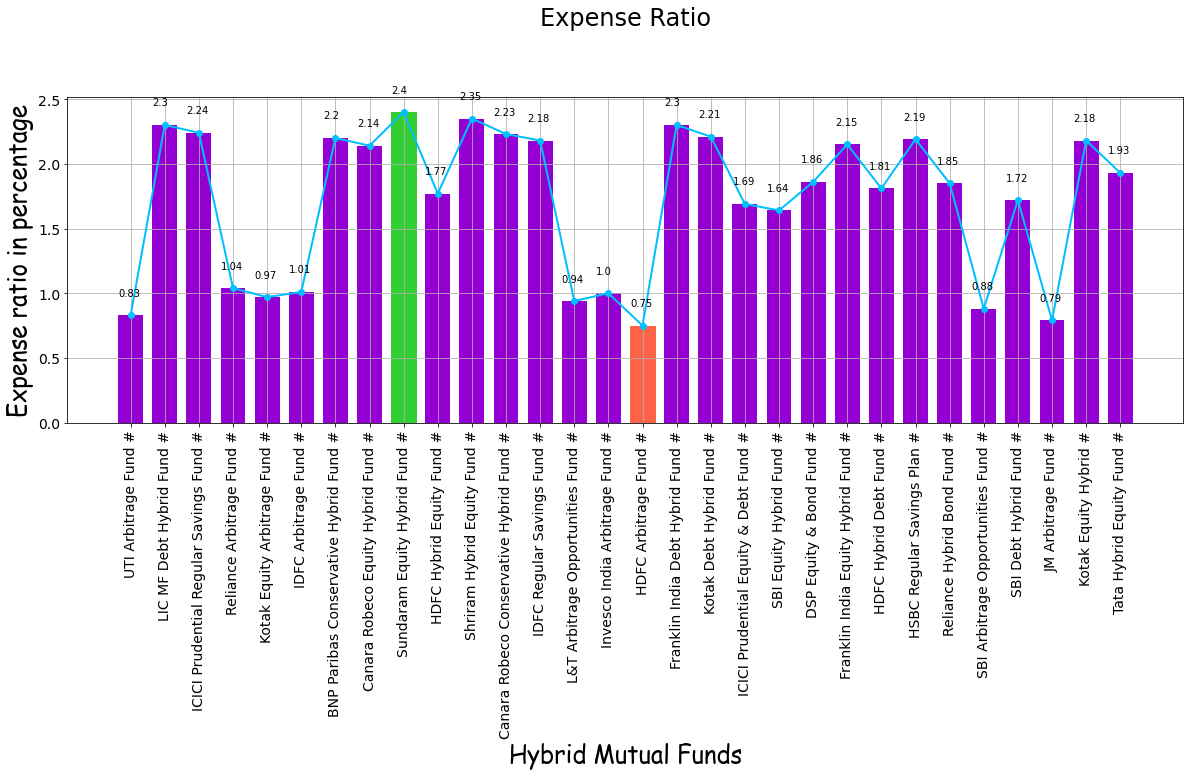

In [15]:
#Expense Ratio
x = data['Fund_Scheme_Name']
y = data['Expense_Ratio']

#Bar Plot
bars = plt.bar(x,y, color='darkviolet', width=0.73)
bars[data['Expense_Ratio'].idxmin()].set_color('tomato')
bars[data['Expense_Ratio'].idxmax()].set_color('limegreen')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Expense ratio in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Expense Ratio', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
#Line Plot
plt.plot(x, y, linewidth='2.0', color='deepskyblue', marker='o', markersize='6')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

#### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "Expense Ratio" where the lowest and the highest expensive schemes have been shown in diffrent colors.

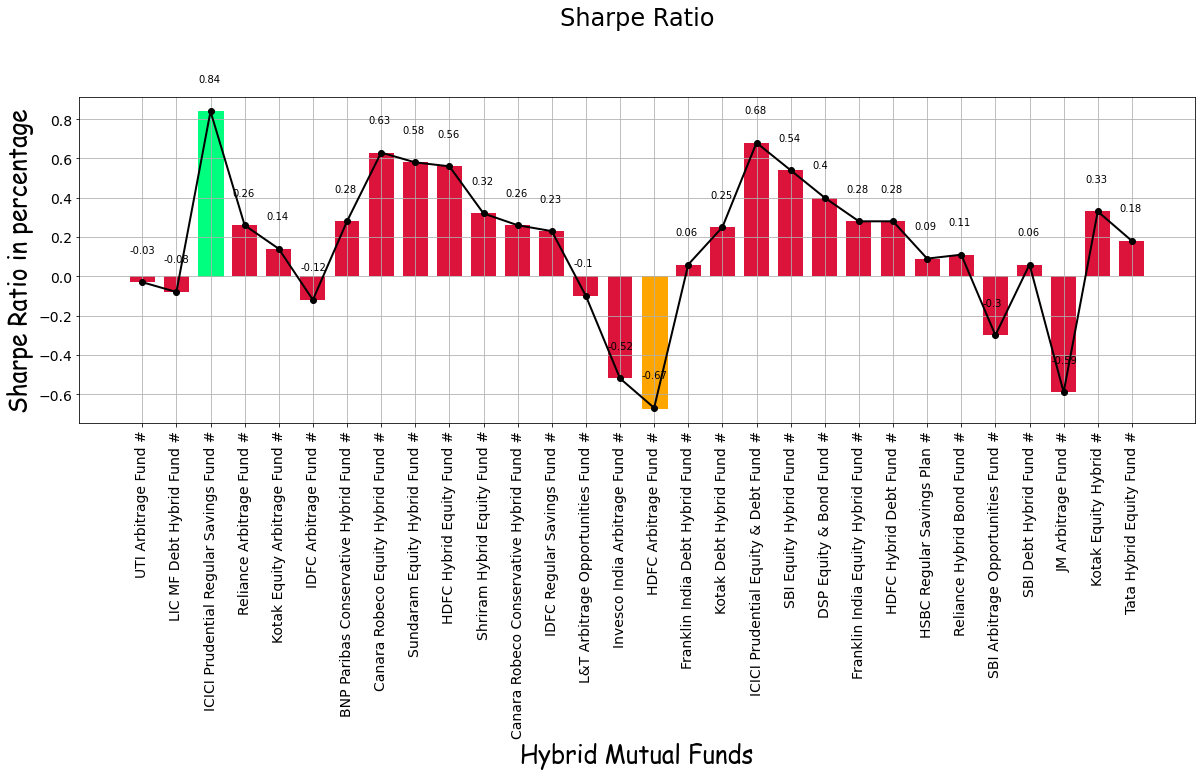

In [16]:
#Sharp Ratio - used for investors to understand ROI compared to risk
x = data['Fund_Scheme_Name']
y = data['Sharpe_Ratio']

#Bar Plot
bars = plt.bar(x,y, color='crimson', width=0.73)
bars[data['Sharpe_Ratio'].idxmin()].set_color('orange')
bars[data['Sharpe_Ratio'].idxmax()].set_color('springgreen')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Sharpe Ratio in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Sharpe Ratio', y=1.20, fontsize=24)
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
#Line Plot
plt.plot(x, y, linewidth='2.0', color='black', marker='o', markersize='6')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

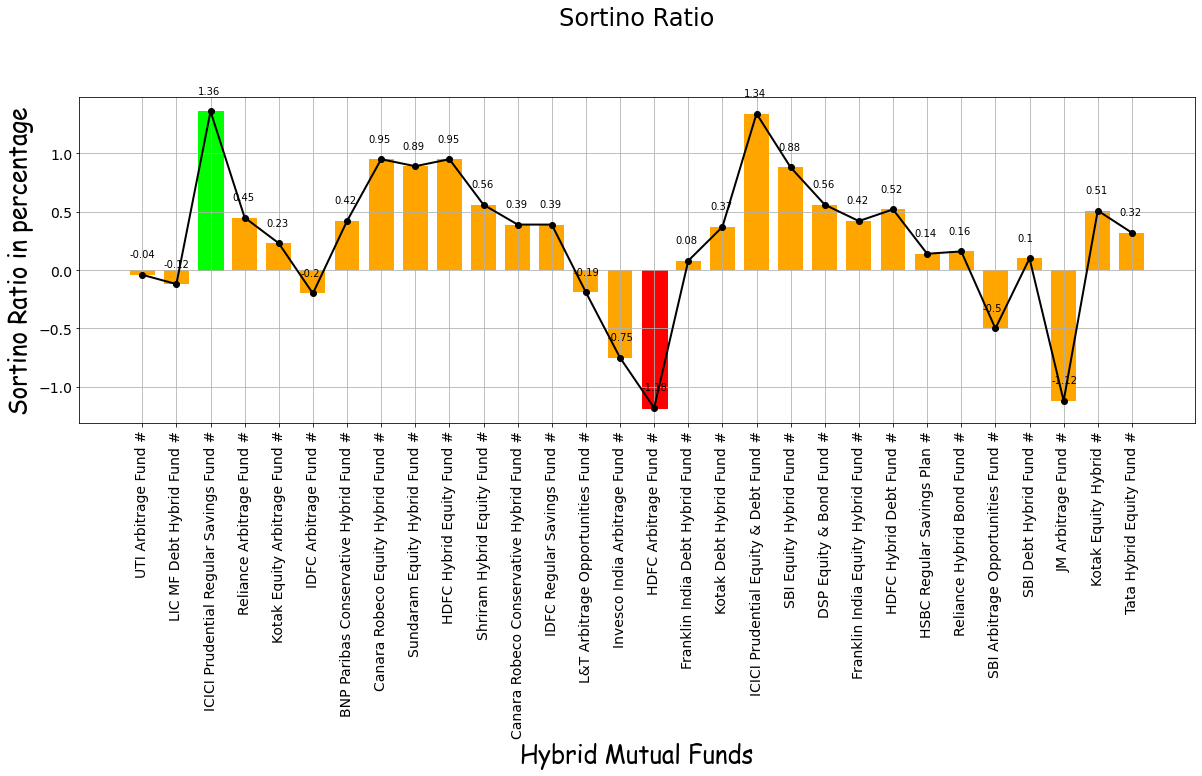

In [17]:
Y=data['Sortino_Ratio']

bars = plt.bar(X,Y, color='orange', width=0.73)
bars[data['Sortino_Ratio'].idxmin()].set_color('red')
bars[data['Sortino_Ratio'].idxmax()].set_color('lime')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Sortino Ratio in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Sortino Ratio', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

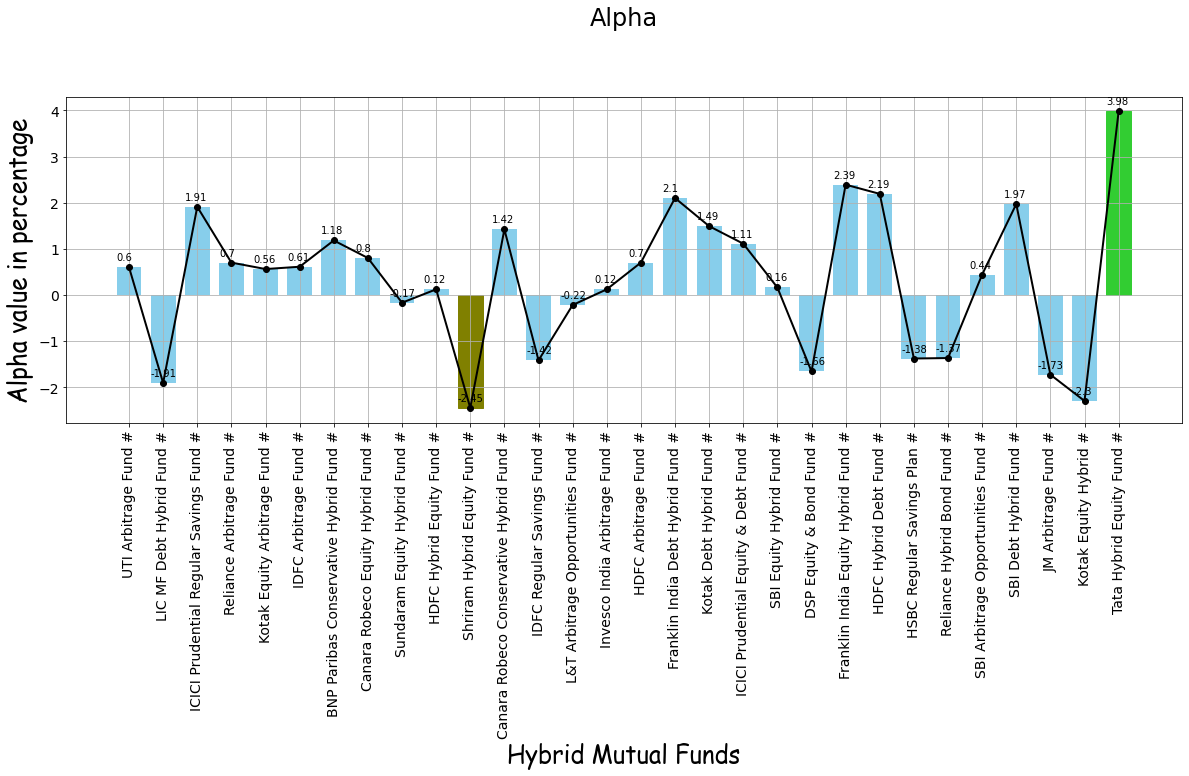

In [18]:
Y=data['Alpha']

bars = plt.bar(X,Y, color='skyblue', width=0.73)
bars[data['Alpha'].idxmin()].set_color('olive')
bars[data['Alpha'].idxmax()].set_color('limegreen')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Alpha value in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.grid()
plt.title('Alpha', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

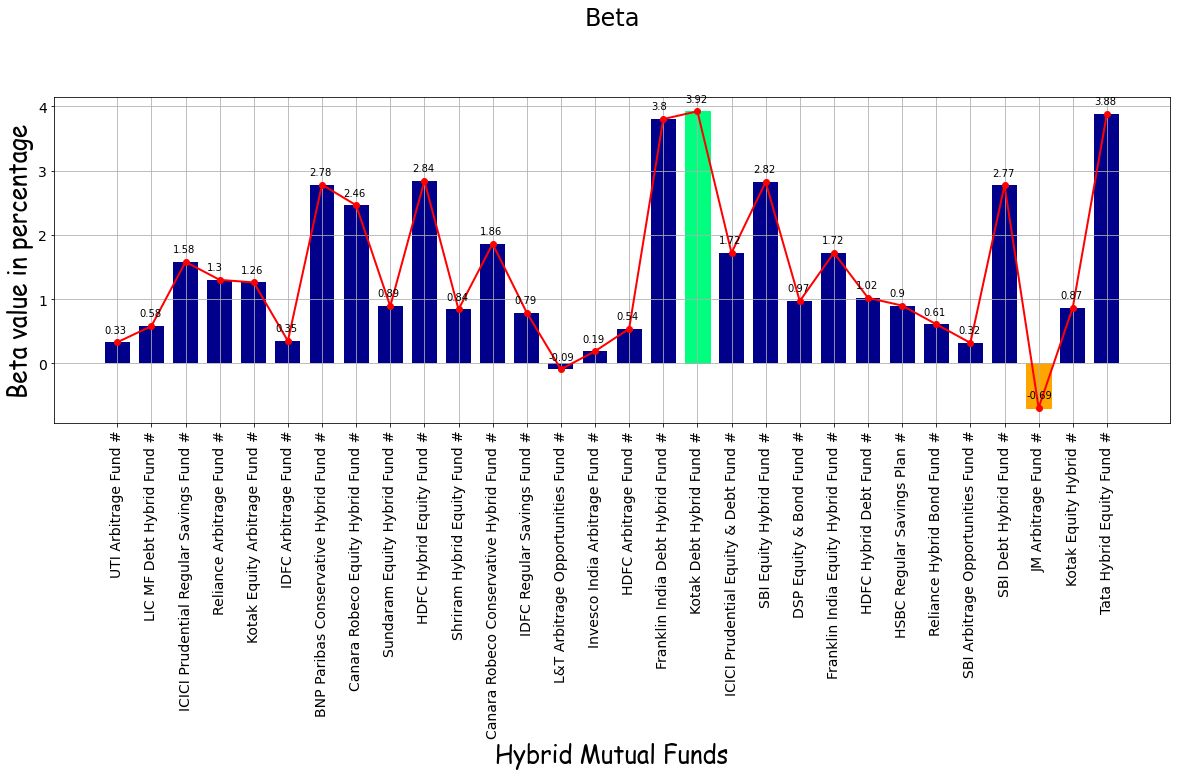

In [19]:
Y=data['Beta']
#Y.head(5)

bars = plt.bar(X,Y, color='darkblue', width=0.73)
bars[data['Beta'].idxmin()].set_color('orange')
bars[data['Beta'].idxmax()].set_color('springgreen')
plt.plot(X, Y, linewidth='2.0', color='red', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Beta value in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Beta', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

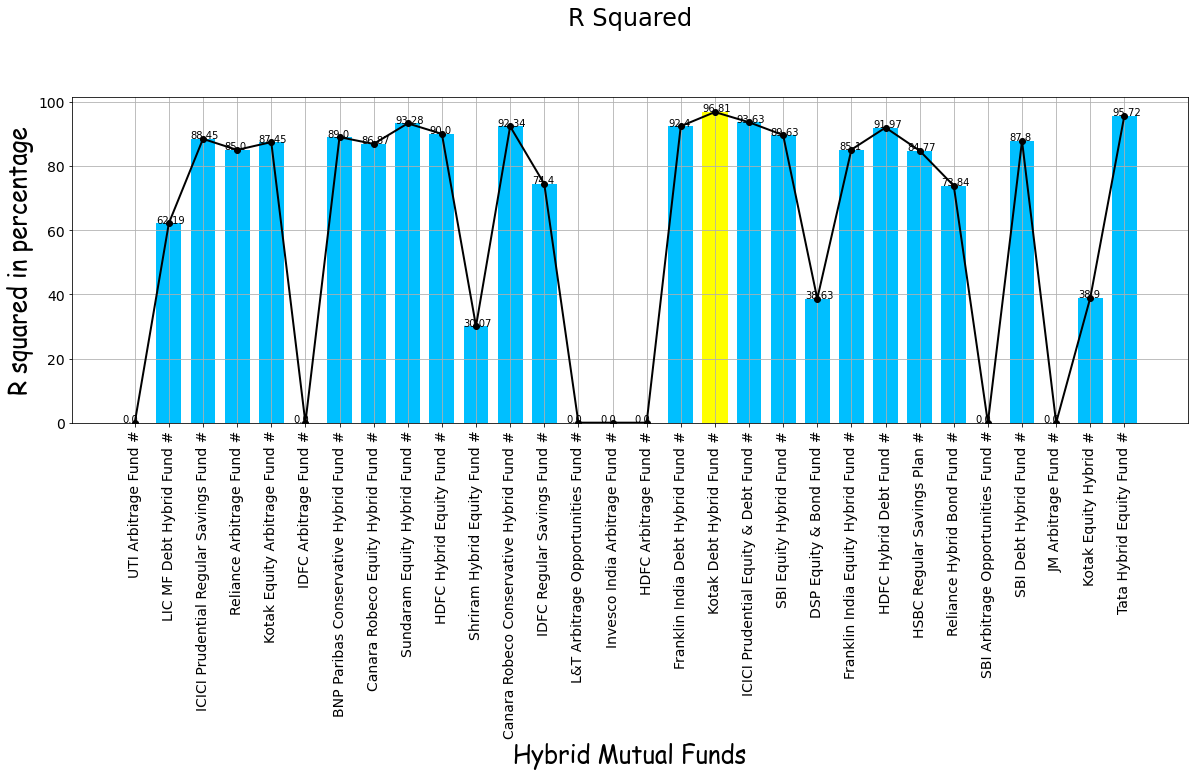

In [20]:
Y=data['R_Squared']

bars = plt.bar(X,Y, color='deepskyblue', width=0.73)
bars[data['R_Squared'].idxmin()].set_color('orange')
bars[data['R_Squared'].idxmax()].set_color('yellow')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('R squared in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('R Squared', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

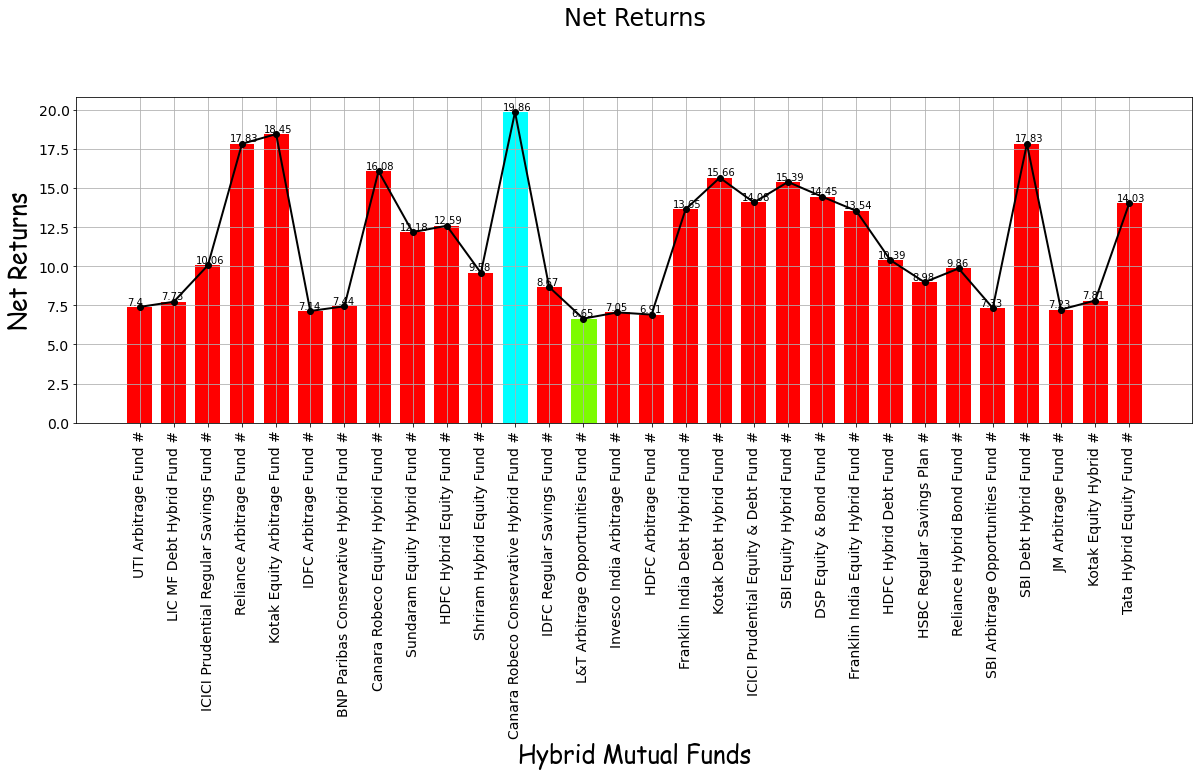

In [21]:
Y=data['Net_Return']

bars = plt.bar(X,Y, color='red', width=0.73)
bars[11].set_color('aqua')
bars[13].set_color('lawngreen')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Net Returns', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Net Returns', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()